In [ ]:
 Import jeopardy.csv and create a dataframe from the data. Find out the following:
a. How many rows are there in the dataframe? What does a row represent in this
dataset? What is the “grain”?
b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?
c. How many unique shows were there each year?
d. How many times was each category used?
e. Which month (over the years) has had the most shows?
f. Are there any answers that appeared multiple times? Find the questions for the top
three most common answers.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jep = "JEOPARDY_CSV.csv"
jep_df = pd.read_csv("JEOPARDY_CSV.csv")
jep_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [167]:
#How many rows are there in the dataframe? 216930
#What does a row represent in this dataset? each row gives a question/answer for for a jeopardy show by date and show number  
#What is the “grain”?


row_count = jep_df["Show Number"].count()
jep_df.tail() #verifying (216929)
pd.DataFrame({"Rows": [row_count]})

,Rows
0,216930


In [12]:
#b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?

# Every column name except 'show number' has leading spces, there are also spaces in the column list as well and date format is incorrect 

jep_df.columns #check columns for spaces

jep_df.columns = [col.strip() for col in jep_df.columns]  #remove spaces from all column names
jep_df.columns #verify 

#strip within the column
jep_df['Category'].str.strip()
jep_df['Answer'].str.strip()
jep_df['Question'].str.strip()

print(jep_df)
#change date format
jep_df["Air Date"] = pd.to_datetime(jep_df["Air Date"]).dt.strftime('%Y-%m-%d')


        Show Number   Air Date             Round  \
0              4680 2004-12-31         Jeopardy!   
1              4680 2004-12-31         Jeopardy!   
2              4680 2004-12-31         Jeopardy!   
3              4680 2004-12-31         Jeopardy!   
4              4680 2004-12-31         Jeopardy!   
...             ...        ...               ...   
216925         4999 2006-05-11  Double Jeopardy!   
216926         4999 2006-05-11  Double Jeopardy!   
216927         4999 2006-05-11  Double Jeopardy!   
216928         4999 2006-05-11  Double Jeopardy!   
216929         4999 2006-05-11   Final Jeopardy!   

                               Category    Value  \
0                               HISTORY    $200    
1       ESPN's TOP 10 ALL-TIME ATHLETES    $200    
2           EVERYBODY TALKS ABOUT IT...    $200    
3                      THE COMPANY LINE    $200    
4                   EPITAPHS & TRIBUTES    $200    
...                                 ...      ...   
216925     

# How many times was each category used?


In [24]:
jp_1=jep_df['Category'].value_counts()
jp_1.head(50)

BEFORE & AFTER             547
SCIENCE                    519
LITERATURE                 496
AMERICAN HISTORY           418
POTPOURRI                  401
WORLD HISTORY              377
WORD ORIGINS               371
COLLEGES & UNIVERSITIES    351
HISTORY                    349
SPORTS                     342
U.S. CITIES                339
WORLD GEOGRAPHY            338
BODIES OF WATER            327
ANIMALS                    324
STATE CAPITALS             314
BUSINESS & INDUSTRY        311
ISLANDS                    301
WORLD CAPITALS             300
U.S. GEOGRAPHY             299
RELIGION                   297
SHAKESPEARE                294
OPERA                      294
LANGUAGES                  284
BALLET                     282
TELEVISION                 281
FICTIONAL CHARACTERS       280
RHYME TIME                 279
TRANSPORTATION             279
PEOPLE                     279
ART & ARTISTS              270
STUPID ANSWERS             270
THE BIBLE                  267
ART     

# How many unique shows were there each year?


In [16]:
#steps from wk 5 grp ex
# first change Air Date to a date format
jep_df["Air Date"] = jep_df["Air Date"].astype('datetime64[ns]')

#then pull year 
jep_df["Year"] = jep_df["Air Date"].dt.year
#jep_df.head()

#grouping the data by year/show and isolating just the unique shows per year
jp2=jep_df.groupby( "Year")['Show Number'].nunique()
print(jp2.head(29))

Year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: Show Number, dtype: int64


# Which month (over the years) has had the most shows?
May and November


In [38]:
#steps from wk 5 grp ex
# first change Air Date to a month date format
jep_df["Air Date"] = jep_df["Air Date"].astype('datetime64[M]')

#then pull months 
jep_df["Month"] = jep_df["Air Date"].dt.month
#jep_df.head()

k=jep_df.groupby("Month")['Show Number'].value_counts()
#sort by by highest number of shows
k.sort_values(ascending=False)

Month  Show Number
5      2941           62
11     5332           62
1      1239           61
7      2978           61
       2981           61
                      ..
2      6086           30
9      2757           30
1      6300           30
10     3022           16
       1178           12
Name: Show Number, Length: 3640, dtype: int64

# Are there any answers that appeared multiple times?


In [51]:
multi=jep_df["Answer"].value_counts()[:50]
#multi.idxmax() #answer given the most 
multi

China                216
Australia            215
Japan                196
Chicago              194
France               193
India                185
California           180
Canada               176
Spain                171
Mexico               164
Alaska               161
Italy                160
Hawaii               157
Texas                153
Paris                149
Germany              147
Russia               141
Florida              140
South Africa         139
Ireland              136
Brazil               133
London               132
Sweden               130
New Orleans          128
George Washington    128
Greece               125
Ronald Reagan        123
New York             122
Egypt                122
Abraham Lincoln      120
Boston               119
Thomas Jefferson     118
Georgia              118
San Francisco        117
Switzerland          116
Norway               111
New Zealand          111
Denmark              109
Philadelphia         109
Virginia             107


In [54]:
#another way of ordering the count by the most times the answer appears
jep_df['Answer'].value_counts().nlargest(20)

China           216
Australia       215
Japan           196
Chicago         194
France          193
India           185
California      180
Canada          176
Spain           171
Mexico          164
Alaska          161
Italy           160
Hawaii          157
Texas           153
Paris           149
Germany         147
Russia          141
Florida         140
South Africa    139
Ireland         136
Name: Answer, dtype: int64

# Find the questions for the top three most common answers


In [47]:
#isloate question column df[]
#value counts [:] limits the list to number input 

jp_iso = jep_df["Question"].value_counts()[:3]
#orders the top 3 
jp_iso.sort_values(ascending=False)

[audio clue]    17
[video clue]    14
[filler]         5
Name: Question, dtype: int64

# Create a visualization that shows the top 5 categories (those referenced the most often)


In [55]:
t_5=jep_df['Category'].value_counts()[:5]

BEFORE & AFTER      547
SCIENCE             519
LITERATURE          496
AMERICAN HISTORY    418
POTPOURRI           401
Name: Category, dtype: int64

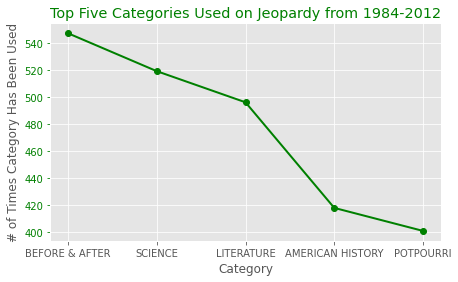

In [99]:
# df by top 5 
t_5=jep_df['Category'].value_counts()[:5]
#create plot
fig, ax = plt.subplots()
#plots df "go-" creates a green line with circles
ax.plot(t_5, 'go-', linewidth=2)
#tick marks
ax.tick_params('y', colors="green")
#labels
plt.xlabel("Category")
plt.ylabel("# of Times Category Has Been Used")
plt.title("Top Five Categories Used on Jeopardy from 1984-2012", color="green")
#chang size so labels fit
fig.set_size_inches([7, 4])
plt.show()